In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from PIL import Image
import zipfile

In [3]:
PATH_TRAIN = "/kaggle/input/dogs-vs-cats/train.zip"
PATH_TEST = "/kaggle/input/dogs-vs-cats/test1.zip"
RANDOM_STATE = 42

In [4]:
with zipfile.ZipFile(PATH_TRAIN, 'r') as train:
    train.extractall(".")

In [5]:
with zipfile.ZipFile(PATH_TEST, 'r') as test:
    test.extractall(".")

In [6]:
os.listdir()

['.virtual_documents', 'test1', 'train']

In [7]:
print(f"Test  : {os.listdir('test1')[:10]} \nTrain : {os.listdir('train')[:10]}") 

Test  : ['1253.jpg', '6024.jpg', '12403.jpg', '3526.jpg', '10931.jpg', '1991.jpg', '1184.jpg', '5002.jpg', '356.jpg', '6379.jpg'] 
Train : ['cat.8114.jpg', 'cat.3002.jpg', 'cat.2539.jpg', 'cat.10044.jpg', 'cat.10149.jpg', 'cat.5518.jpg', 'cat.6961.jpg', 'dog.5560.jpg', 'cat.4708.jpg', 'dog.12420.jpg']


In [8]:
extracted_train = "/kaggle/working/train"
extracted_test = "/kaggle/working/test1"

### Testing one image

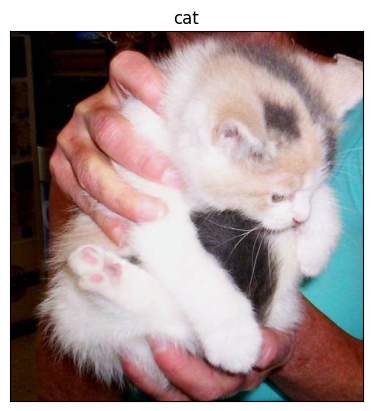

In [29]:
img1 = Image.open(os.path.join(extracted_train,os.listdir('train')[0]))
plt.imshow(img1)
plt.title(os.listdir('train')[0].split('.')[0])
plt.xticks([])
plt.yticks([])
plt.show()

### Sample training images

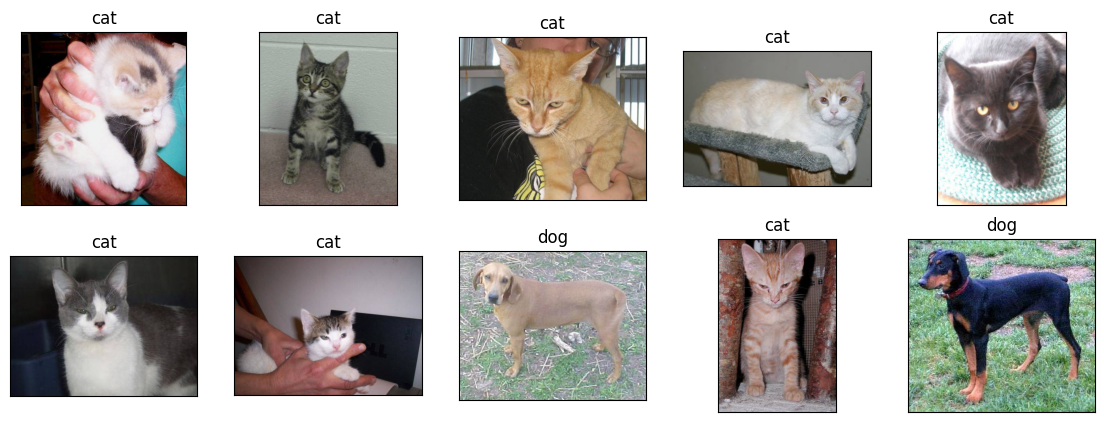

In [30]:
plt.figure(figsize=(14,13))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(Image.open(os.path.join(extracted_train,os.listdir('train')[i])))
    plt.title(os.listdir('train')[i].split(".")[0])
    plt.xticks([])
    plt.yticks([])

In [34]:
def load_preprocess(directory):
    image_data = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((128, 128))
            img_array = np.array(img)
            
            label = filename.split(".")[0]
            
            image_data.append(img_array)
            labels.append(label)
            
    return np.array(image_data), np.array(labels)

In [36]:
train_images, train_labels = load_preprocess(extracted_train)
test_images, test_labels = load_preprocess(extracted_test)

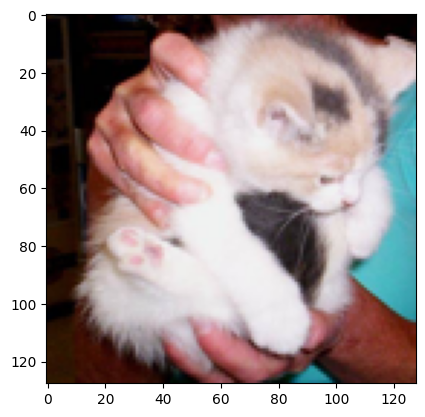

In [39]:
plt.imshow(train_images[0])

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [41]:
base_model = VGG16(weights = 'imagenet', include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [42]:
train_features = base_model.predict(train_images)

782/782 [==============================] - 2351s 3s/step


In [48]:
train_features.shape

(25000, 4, 4, 512)

In [65]:
4*4*512

8192

In [53]:
svc = SVC(kernel='rbf')

In [49]:
train_features_flattened = train_features.reshape(train_features.shape[0], -1)
train_features_flattened.shape

(25000, 8192)

In [54]:
svc.fit(train_features_flattened, train_labels)

SVC()

In [57]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

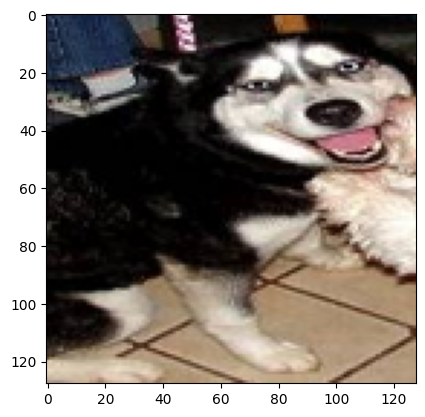

In [61]:
plt.imshow(test_images[0])

In [69]:
test_features = base_model.predict(test_images)

391/391 [==============================] - 1183s 3s/step


In [70]:
test = test_features.reshape(test_features.shape[0], -1)
test.shape

(12500, 8192)

In [73]:
preds = svc.predict(test)

In [74]:
preds

array(['dog', 'cat', 'dog', ..., 'cat', 'dog', 'cat'], dtype='<U3')

In [75]:
submission = pd.read_csv("/kaggle/input/dogs-vs-cats/sampleSubmission.csv")
submission.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [78]:
submission['l'] = preds

In [92]:
submission['label']=submission['l'].replace('dog',1).replace('cat',0)

In [96]:
submission.drop('l', axis=1, inplace=True)

In [97]:
submission

,id,label
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
12495,12496,0
12496,12497,1
12497,12498,0
12498,12499,1


In [98]:
submission.to_csv('submission.csv',)